In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict
import itertools

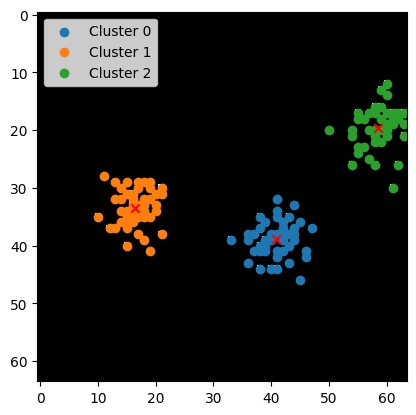

Clusters                       Distances 
----------------------------------------
Cluster 0 and Cluster 1          24.97
Cluster 0 and Cluster 2          26.08
Cluster 1 and Cluster 2          44.16


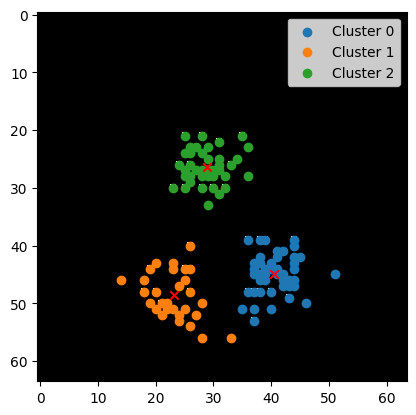

Clusters                       Distances 
----------------------------------------
Cluster 0 and Cluster 1          17.83
Cluster 0 and Cluster 2          21.92
Cluster 1 and Cluster 2          22.96


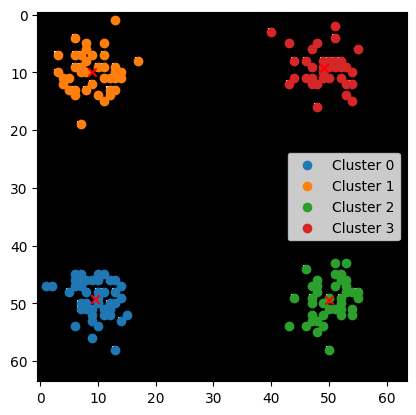

Clusters                       Distances 
----------------------------------------
Cluster 0 and Cluster 1          39.26
Cluster 0 and Cluster 2          40.61
Cluster 0 and Cluster 3          56.34
Cluster 1 and Cluster 2          56.89
Cluster 1 and Cluster 3          40.12
Cluster 2 and Cluster 3          40.14


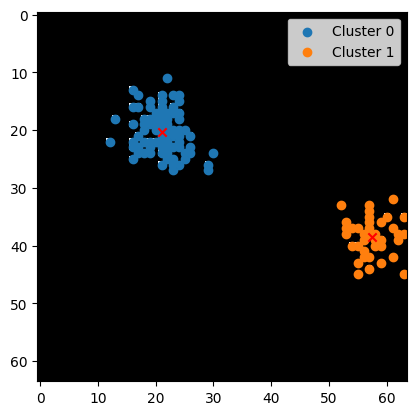

Clusters                       Distances 
----------------------------------------
Cluster 0 and Cluster 1          40.68


In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict
import itertools

def image_to_array(image_path):
    image = Image.open(image_path).convert('L')
    array = np.array(image)
    return array

def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def initialize_centroids(data, k):
    centroids_idx = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[centroids_idx]
    return centroids

def assign_to_clusters(data, centroids):
    distances = np.array([np.linalg.norm(data - centroid, axis=1) for centroid in centroids])
    labels = np.argmin(distances, axis=0)
    return labels

def update_centroids(data, labels, k):
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        old_centroids = centroids
        labels = assign_to_clusters(data, centroids)
        centroids = update_centroids(data, labels, k)
        if np.allclose(old_centroids, centroids):
            break
    return centroids, labels

def find_lights(image_array):
    threshold = 200
    coordinates = np.argwhere(image_array > threshold)
    return coordinates

def cluster_points(coordinates, k, merge_distance=3):
    data = np.array(coordinates)
    centroids, labels = k_means(data, k)
    clusters = defaultdict(list)
    for i, label in enumerate(labels):
        clusters[label].append(tuple(coordinates[i]))

    # Merge clusters that are close to each other
    merged_clusters = {}
    cluster_keys = list(clusters.keys())
    for i in range(len(cluster_keys)):
        merged = False
        for j in range(i + 1, len(cluster_keys)):
            if euclidean_distance(np.array(centroids[i]), np.array(centroids[j])) < merge_distance:
                merged_clusters[i] = clusters[i] + clusters[j]
                merged_clusters[j] = []  # Empty the cluster to be merged
                merged = True
                break
        if not merged:
            merged_clusters[i] = clusters[i]

    # Remove empty clusters
    merged_clusters = {k: v for k, v in merged_clusters.items() if v}

    return merged_clusters


def calculate_centers(clusters):
    centers = {}
    for cluster_id, points in clusters.items():
        center = np.mean(points, axis=0)
        centers[cluster_id] = center
    return centers

def calculate_distances(centers):
    distances = {}
    city_ids = list(centers.keys())
    for (cluster1, cluster2) in itertools.combinations(city_ids, 2):
        distance = euclidean_distance(np.array(centers[cluster1]), np.array(centers[cluster2]))
        distances[(cluster1, cluster2)] = distance
    return distances

def plot_results(image_array, clusters, centers):
    plt.imshow(image_array, cmap='gray')
    for cluster_id, points in clusters.items():
        points = np.array(points)
        plt.scatter(points[:, 1], points[:, 0], label=f'Cluster {cluster_id}')
    for center in centers.values():
        plt.scatter(center[1], center[0], c='red', marker='x')
    plt.legend()
    plt.show()

def display_distances(distances):
    print(f"{'Clusters':<30} {'Distances':<10}")
    print("-" * 40)
    for (city1, city2), distance in distances.items():
        print(f"Cluster {city1} and Cluster {city2:<10} {distance:.2f}")

def main(image_path, k):
    image_array = image_to_array(image_path)
    coordinates = find_lights(image_array)
    clusters = cluster_points(coordinates, k)
    centers = calculate_centers(clusters)
    distances = calculate_distances(centers)
    
    plot_results(image_array, clusters, centers)
    display_distances(distances)

# Path to the image file
image_path1 = '1.png'
k1 = 3
main(image_path1, k1)

image_path2 = '2.png'
k2 = 3
main(image_path2, k2)

image_path3 = '3.png'
k3 = 4
main(image_path3, k3)

image_path4 = '4.png'
k4 = 2
main(image_path4, k4)


For K-means clustering, you need to predict K beforehand. The algorithm then tries to find the best way to group your data into those K groups. It does this by repeatedly assigning data points to the nearest group and then recalculating the group's center. This process keeps going till the no. of iterations you give. However, there's no clear way to measure how good the grouping is, so it's more about finding a useful way to split your data rather than finding the "perfect" split.

Density-based spatial clustering of applications with noise (DBSCAN) is a method used to find clusters of data points in a dataset. Unlike K means clustering algorithms, DBSCAN doesn't requires the number of clusters beforehand. Instead, it works by grouping together closely packed points and marking points that are isolated or too far from a cluster as outliers or noise. Two main parameters here are -
Epsilon (ε)- Epsilon is the maximum distance between two points for them to be considered as neighbors. If the distance between two points is less than or equal to epsilon, they are considered neighbors. Points within epsilon distance of a core point are included in the same cluster.
MinPts- MinPts is the minimum number of points required to form a dense region. A point is considered a core point if there are at least minPts points (including the point itself) within epsilon distance of it. Points that are not core points but are within epsilon distance of a core point are considered border points.

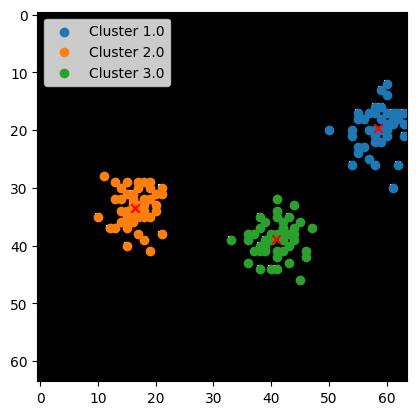

Clusters                       Distances 
----------------------------------------
Cluster 1.0 and Cluster 2.0        44.16
Cluster 1.0 and Cluster 3.0        26.08
Cluster 2.0 and Cluster 3.0        24.97


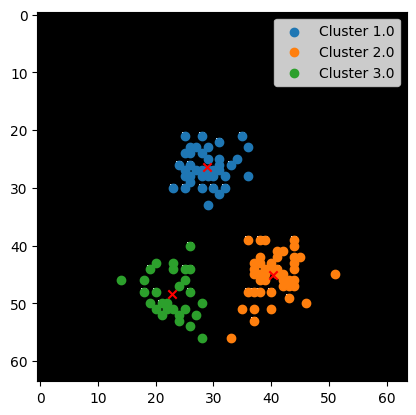

Clusters                       Distances 
----------------------------------------
Cluster 1.0 and Cluster 2.0        22.04
Cluster 1.0 and Cluster 3.0        22.80
Cluster 2.0 and Cluster 3.0        17.92


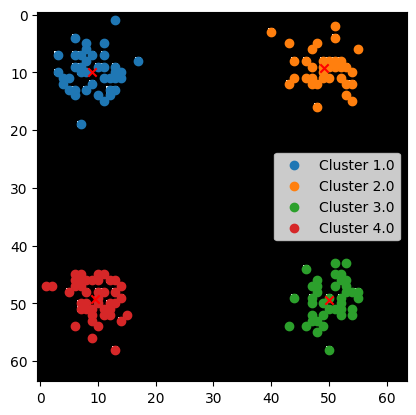

Clusters                       Distances 
----------------------------------------
Cluster 1.0 and Cluster 2.0        40.12
Cluster 1.0 and Cluster 3.0        56.89
Cluster 1.0 and Cluster 4.0        39.26
Cluster 2.0 and Cluster 3.0        40.14
Cluster 2.0 and Cluster 4.0        56.34
Cluster 3.0 and Cluster 4.0        40.61


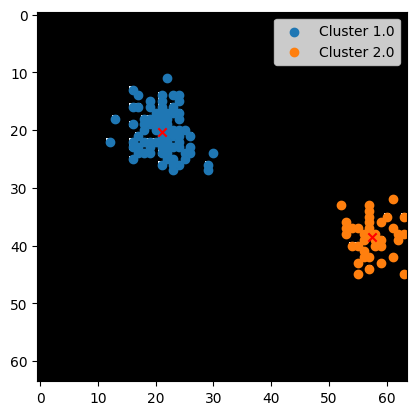

Clusters                       Distances 
----------------------------------------
Cluster 1.0 and Cluster 2.0        40.68


In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict
import itertools

def image_to_array(image_path):
    image = Image.open(image_path).convert('L')
    array = np.array(image)
    return array

def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def region_query(data, point, epsilon):
    neighbors = []
    for i, sample in enumerate(data):
        if euclidean_distance(sample, point) < epsilon:
            neighbors.append(i)
    return neighbors

def expand_cluster(data, labels, point, neighbors, cluster_id, epsilon, minPts):
    labels[point] = cluster_id
    i = 0
    while i < len(neighbors):
        neighbor = neighbors[i]
        if labels[neighbor] == -1:
            labels[neighbor] = cluster_id
        elif labels[neighbor] == 0:
            labels[neighbor] = cluster_id
            new_neighbors = region_query(data, data[neighbor], epsilon)
            if len(new_neighbors) >= minPts:
                neighbors.extend(new_neighbors)
        i += 1

def dbscan(data, epsilon, minPts):
    labels = np.zeros(len(data))
    cluster_id = 0
    for point in range(len(data)):
        if labels[point] != 0:
            continue
        neighbors = region_query(data, data[point], epsilon)
        if len(neighbors) < minPts:
            labels[point] = -1
        else:
            cluster_id += 1
            expand_cluster(data, labels, point, neighbors, cluster_id, epsilon, minPts)
    return labels

def cluster_points(coordinates, epsilon, minPts):
    data = np.array(coordinates)
    labels = dbscan(data, epsilon, minPts)
    clusters = defaultdict(list)
    for i, label in enumerate(labels):
        clusters[label].append(tuple(coordinates[i]))
    return clusters

def calculate_centers(clusters):
    centers = {}
    for cluster_id, points in clusters.items():
        center = np.mean(points, axis=0)
        centers[cluster_id] = center
    return centers

def calculate_distances(centers):
    distances = {}
    city_ids = list(centers.keys())
    for (cluster1, cluster2) in itertools.combinations(city_ids, 2):
        distance = euclidean_distance(np.array(centers[cluster1]), np.array(centers[cluster2]))
        distances[(cluster1, cluster2)] = distance
    return distances

def plot_results(image_array, clusters, centers):
    plt.imshow(image_array, cmap='gray')
    for cluster_id, points in clusters.items():
        points = np.array(points)
        plt.scatter(points[:, 1], points[:, 0], label=f'Cluster {cluster_id}')
    for center in centers.values():
        plt.scatter(center[1], center[0], c='red', marker='x')
    plt.legend()
    plt.show()

def display_distances(distances):
    print(f"{'Clusters':<30} {'Distances':<10}")
    print("-" * 40)
    for (city1, city2), distance in distances.items():
        print(f"Cluster {city1} and Cluster {city2:<10} {distance:.2f}")

def main(image_path, epsilon, minPts):
    image_array = image_to_array(image_path)
    coordinates = find_lights(image_array)
    clusters = cluster_points(coordinates, epsilon, minPts)
    centers = calculate_centers(clusters)
    distances = calculate_distances(centers)
    
    plot_results(image_array, clusters, centers)
    display_distances(distances)

# Path to the image file
image_path1 = '1.png'
epsilon1 = 10
minPts1 = 12
main(image_path1, epsilon1, minPts1)

image_path2 = '2.png'
epsilon2 = 7
minPts2 = 7
main(image_path2, epsilon2, minPts2)

image_path3 = '3.png'
epsilon3 = 20
minPts3 = 25
main(image_path3, epsilon3, minPts3)

image_path4 = '4.png'
epsilon4 = 10
minPts4 = 10
main(image_path4, epsilon4, minPts4)
